# ***Pre-Processing : Capturing the boundary and text lines***

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
test_img_path = '/content/drive/MyDrive/BE Project : AyuFlora /Dataset/Stem_Dataset/Jesthamadh /Jesthamadh _251.jpg'

# ***Reading the Image***

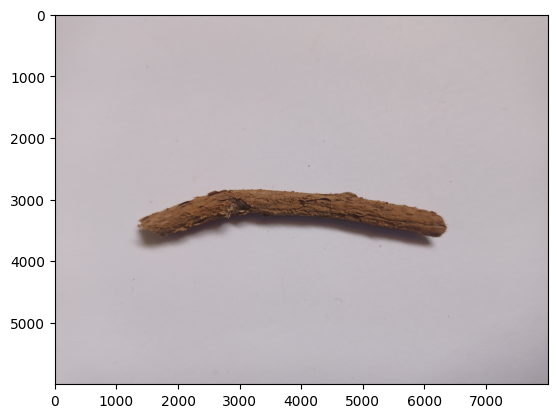

In [19]:
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img,cmap="Greys_r")

# ***Resizing Image (Optional)***

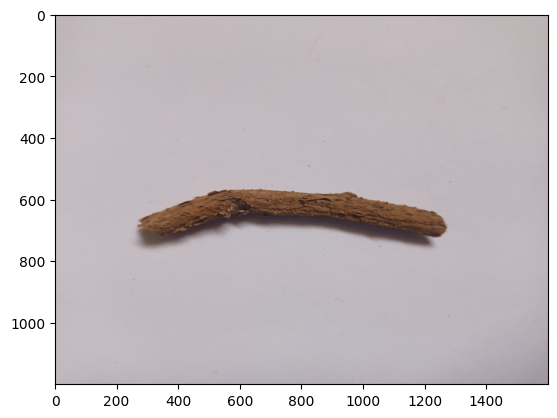

In [20]:
resized_image = cv2.resize(img, (1600, 1200))
plt.imshow(resized_image,cmap="Greys_r")

# ***Converting image to grayscale***

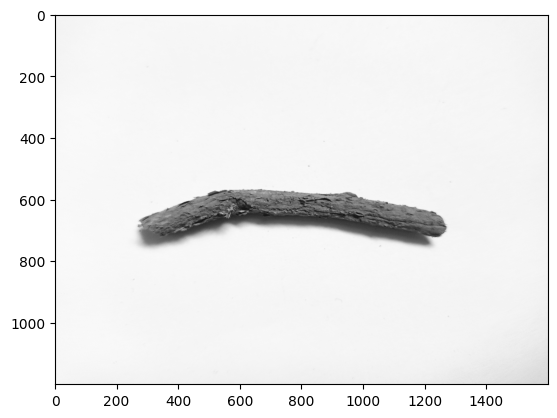

In [21]:
gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap="Greys_r")

# ***Smoothing image using Guassian filter***

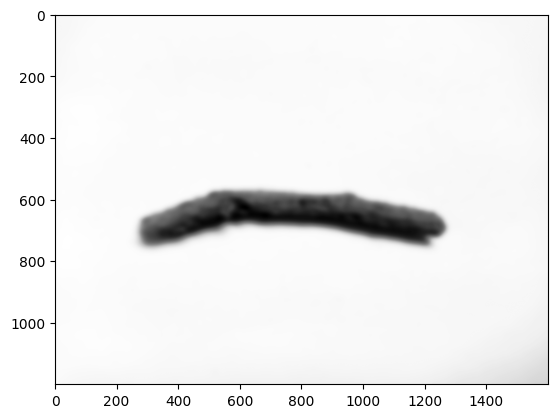

In [22]:
blur = cv2.GaussianBlur(gs, (55,55),0)
plt.imshow(blur,cmap="Greys_r")

# ***Adaptive image thresholding using Otsu's thresholding method***

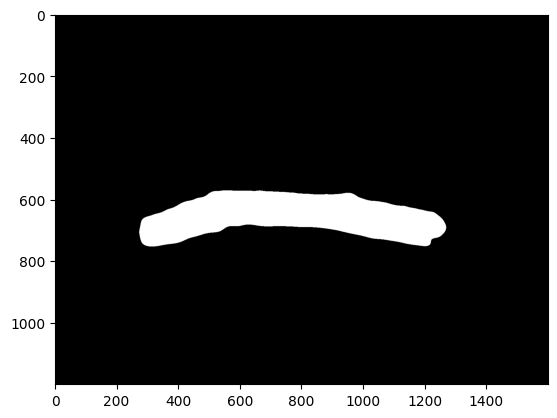

In [23]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

# ***Closing of holes using Morphological Transformation***

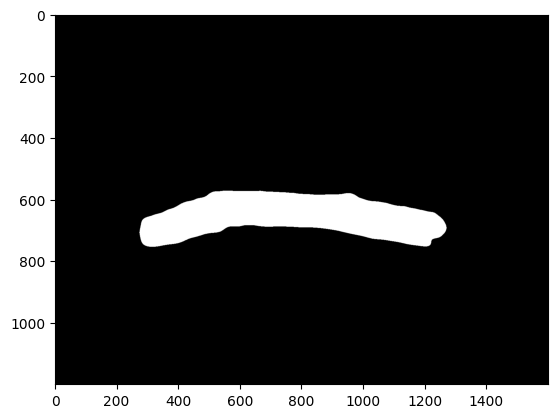

In [24]:
kernel = np.ones((30,30),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap="Greys_r")

In [25]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [26]:
len(contours)

1


# ***Finding the correct leaf contour from the list of contours***

The following function finds the correct leaf contour by taking any coordinate point of the leaf (default - center point) and checks whether the current contour contains that point or not. Returns the index of the correct contour.


In [27]:
def find_contour(cnts):
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in cnts:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    print(contains)
    return val[0]

# ***Mask image for background subtraction using leaf contour***

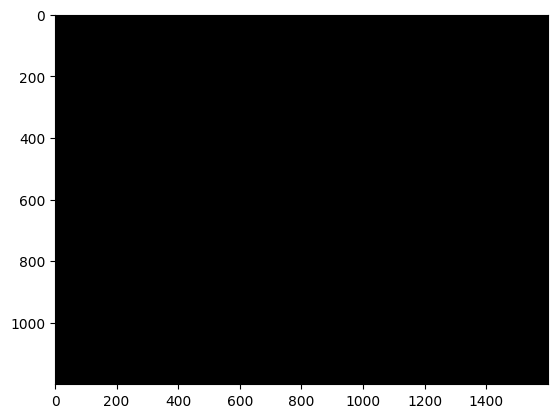

In [28]:
black_img = np.empty([1200,1600,3],dtype=np.uint8)
black_img.fill(0)
plt.imshow(black_img,cmap="Greys_r")

[1.0]


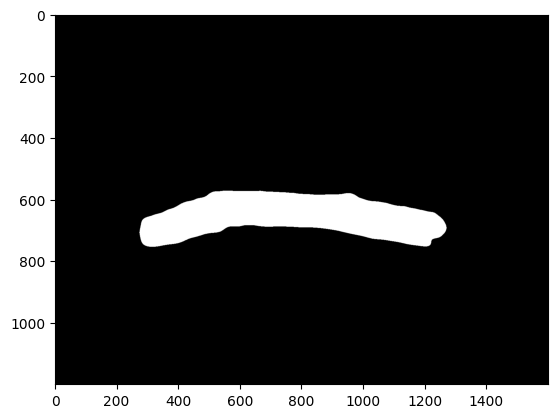

In [29]:
index = find_contour(contours)
cnt = contours[index]
mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
plt.imshow(mask)

# ***Performing masking operation on the original image***

In [30]:
maskedImg = cv2.bitwise_and(resized_image, mask)

In [31]:
white_pix = [255,255,255]
black_pix = [0,0,0]

final_img = maskedImg
h,w,channels = final_img.shape
for x in range(0,w):
    for y in range(0,h):
        channels_xy = final_img[y,x]
        if all(channels_xy == black_pix):
            final_img[y,x] = white_pix

# ***Background subtracted image***

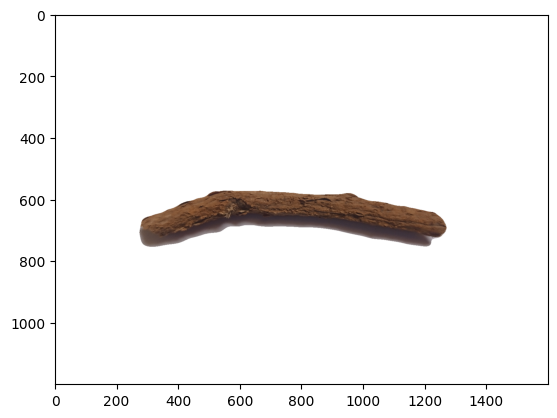

In [32]:
plt.imshow(final_img)

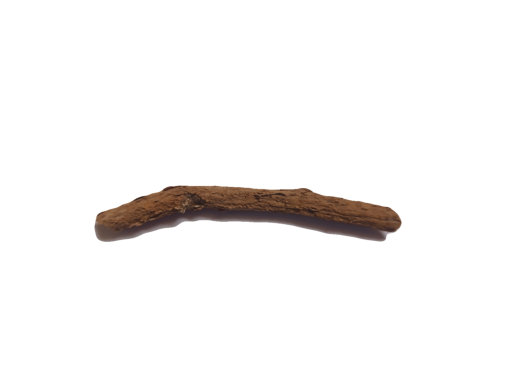

In [36]:
save_path = '/content/drive/MyDrive/BE Project : AyuFlora /Dataset/ColabFigures'
if not os.path.exists(save_path):
    os.makedirs(save_path)

plt.clf()

plt.imshow(final_img)
filename = "Jth_1.jpg"
full_path = os.path.join(save_path, filename)
plt.axis('off')
# Save the figure
plt.savefig(full_path, pad_inches=0)
plt.show()